In [1]:
from bs4 import BeautifulSoup
import lxml
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
wiki_url = 'https://en.wikipedia.org/wiki/List_of_countries_by_Human_Development_Index'

In [3]:
response = requests.get(wiki_url)
soup = BeautifulSoup(response.text,'lxml')

In [4]:
hdi_list = soup.find('table', attrs={'class':"wikitable sortable plainrowheaders"})

In [5]:
data=pd.read_html(str(hdi_list))[0]
display(data)

Rank                                  \
    2019 data (2020 report)​[2] Change over 5 years (2014)​[19]   
0                             1                             NaN   
1                             2                             (7)   
2                             2                             NaN   
3                             4                             (7)   
4                             4                             (4)   
..                          ...                             ...   
184                         185                             (5)   
185                         185                             (3)   
186                         187                             (1)   
187                         188                             (1)   
188                         189                             (1)   

                       Nation                         HDI  \
                       Nation 2019 data (2020 report)​[2]   
0                      Norway                       0.957   
1                     Ireland                       0.955   
2                 Switzerland                       0.955   
3                   Hong Kong                       0.949   
4                     Iceland                       0.949   
..                        ...                         ...   
184                   Burundi                       0.433   
185               South Sudan                       0.433   
186                      Chad                       0.398   
187  Central African Republic                       0.397   
188                     Niger                       0.394   

                                            
    Average annual growth (2010–2019)​[19]  
0                                    0.20%  
1                                    0.65%  
2                                    0.16%  
3                                    0.54%  
4                                    0.62%  
..                                     ...  
184                                  0.58%  
185                                  0.61%  
186                                  0.84%  
187                                  0.94%  
188                                  1.95%  

[189 rows x 5 columns]

In [6]:
data.columns = ['Rank', '5 Year Change', 'Nation', 'HDI', 'Avg Growth']
data

,Rank,5 Year Change,Nation,HDI,Avg Growth
0,1,NaN,Norway,0.957,0.20%
1,2,(7),Ireland,0.955,0.65%
2,2,NaN,Switzerland,0.955,0.16%
3,4,(7),Hong Kong,0.949,0.54%
4,4,(4),Iceland,0.949,0.62%
...,...,...,...,...,...
184,185,(5),Burundi,0.433,0.58%
185,185,(3),South Sudan,0.433,0.61%
186,187,(1),Chad,0.398,0.84%
187,188,(1),Central African Republic,0.397,0.94%


In [7]:
data.sort_values(by='Nation', inplace=True, ignore_index = True)
data

,Rank,5 Year Change,Nation,HDI,Avg Growth
0,169,(5),Afghanistan,0.511,0.89%
1,69,(4),Albania,0.795,0.72%
2,91,NaN,Algeria,0.748,0.41%
3,36,(4),Andorra,0.868,0.40%
4,148,(4),Angola,0.581,1.31%
...,...,...,...,...,...
184,113,(44),Venezuela,0.711,0.69%
185,117,(1),Vietnam,0.704,0.70%
186,179,(16),Yemen,0.470,0.82%
187,146,NaN,Zambia,0.584,1.15%


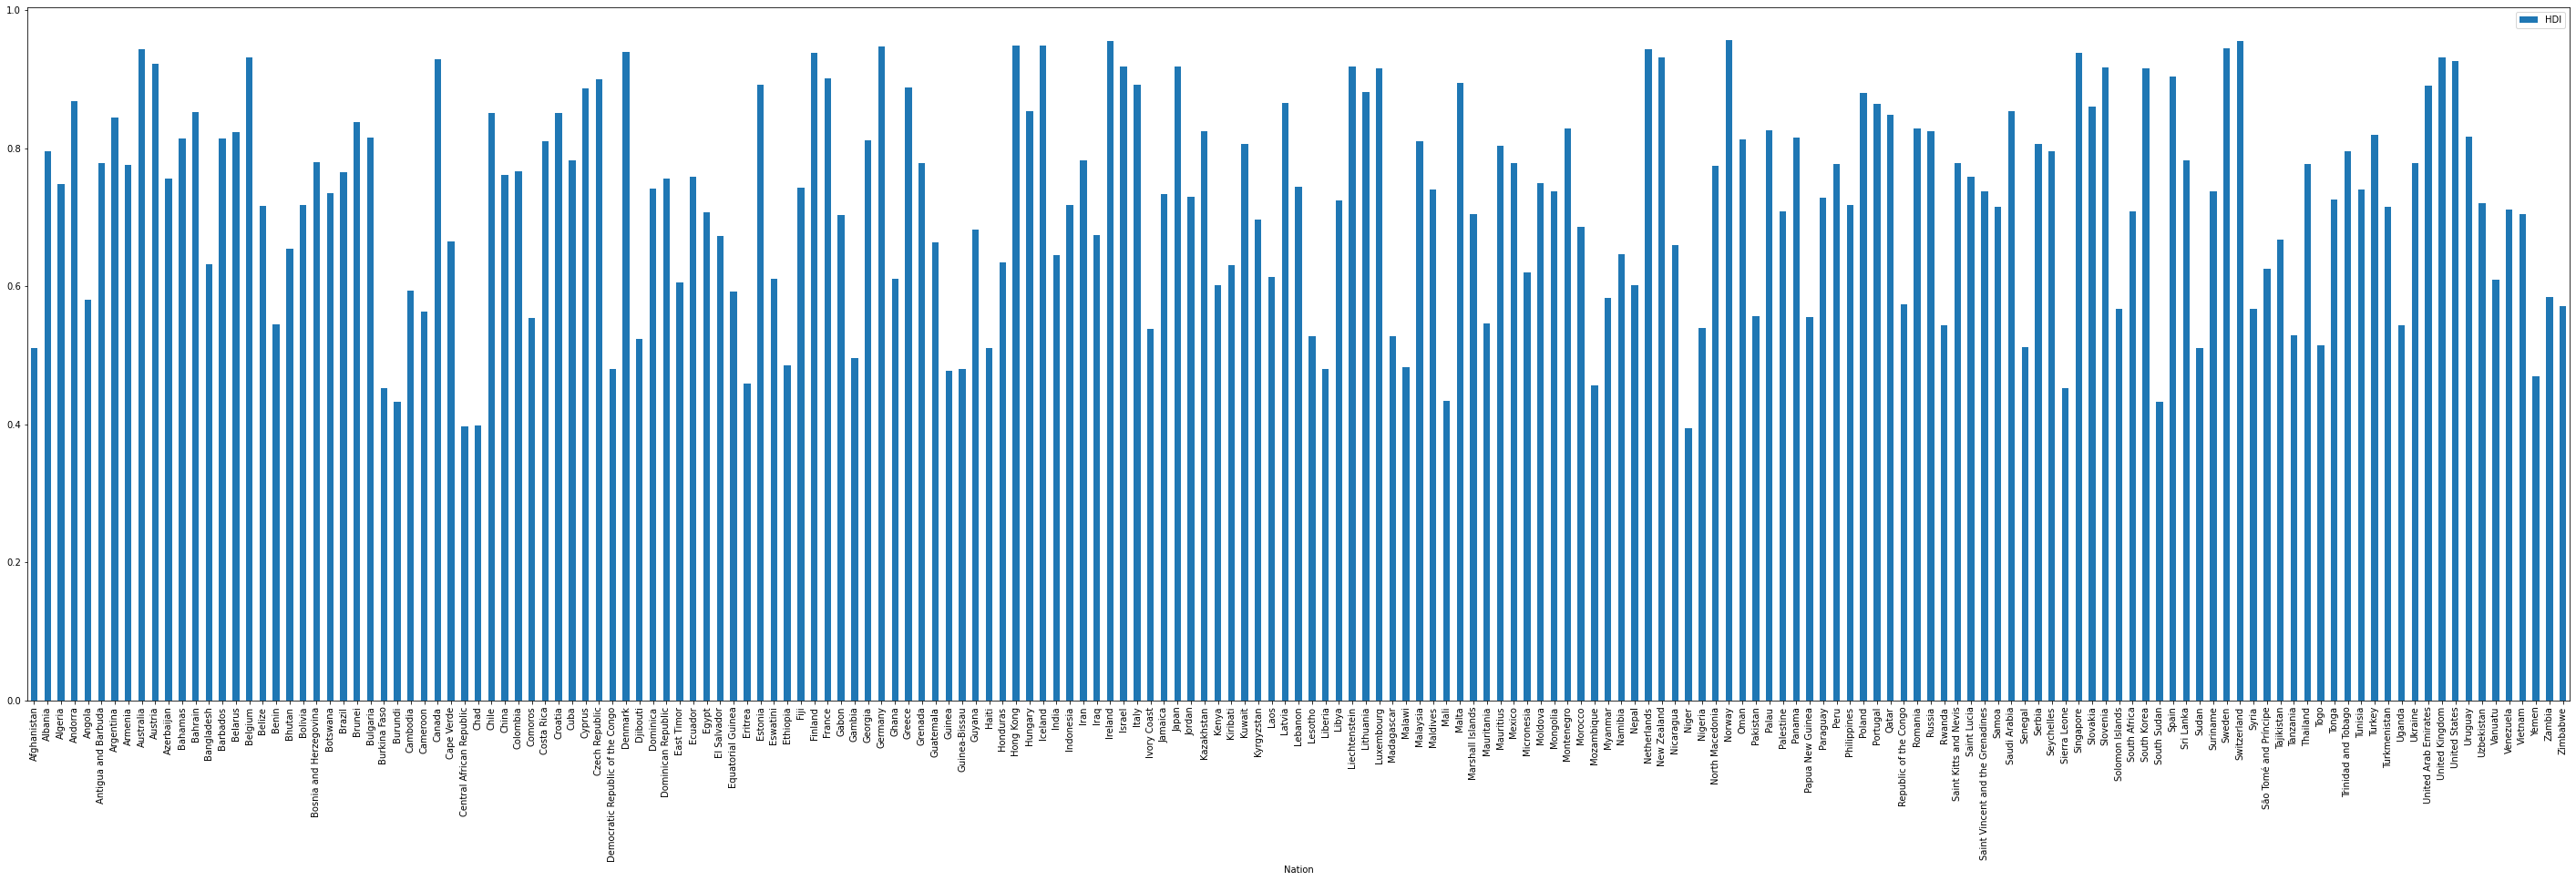

In [8]:
data.plot(x='Nation', y='HDI', kind='bar', figsize=(50,14))
plt.show()

In [9]:
data.isnull()

,Rank,5 Year Change,Nation,HDI,Avg Growth
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
184,False,False,False,False,False
185,False,False,False,False,False
186,False,False,False,False,False
187,False,True,False,False,False


In [10]:
data = data.fillna(0)

In [11]:
data

,Rank,5 Year Change,Nation,HDI,Avg Growth
0,169,(5),Afghanistan,0.511,0.89%
1,69,(4),Albania,0.795,0.72%
2,91,0,Algeria,0.748,0.41%
3,36,(4),Andorra,0.868,0.40%
4,148,(4),Angola,0.581,1.31%
...,...,...,...,...,...
184,113,(44),Venezuela,0.711,0.69%
185,117,(1),Vietnam,0.704,0.70%
186,179,(16),Yemen,0.470,0.82%
187,146,0,Zambia,0.584,1.15%


In [12]:
data['Indexes'] = data['Nation'].str.find('Iceland')
data.drop('Indexes', axis=1, inplace=True)

In [13]:
high_hdi = data.loc[data['HDI'] > 0.900]

<AxesSubplot:xlabel='Nation'>

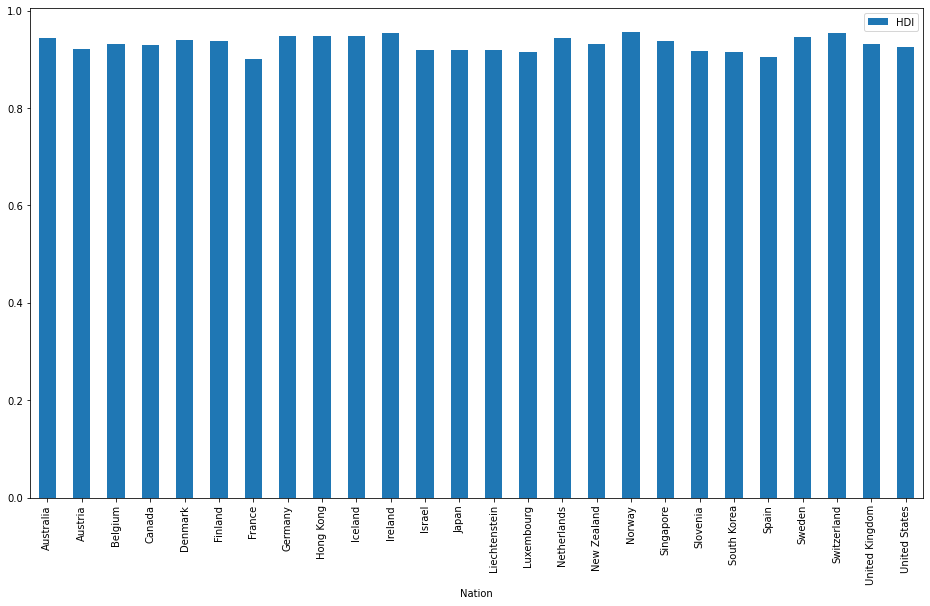

In [14]:
high_hdi.plot(x='Nation', y='HDI', kind='bar', figsize=(16,9))

In [15]:
high_hdi.describe()

,Rank,HDI
count,26.000000,26.000000
mean,13.153846,0.932423
std,7.624656,0.015761
min,1.000000,0.901000
25%,7.250000,0.919000
50%,13.500000,0.931500
75%,19.000000,0.944750
max,26.000000,0.957000


{'whiskers': [<matplotlib.lines.Line2D at 0x15b90f68670>,
 'caps': [<matplotlib.lines.Line2D at 0x15b90f68cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15b90f68370>],
 'medians': [<matplotlib.lines.Line2D at 0x15b90f791f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15b90f794c0>],
 'means': []}

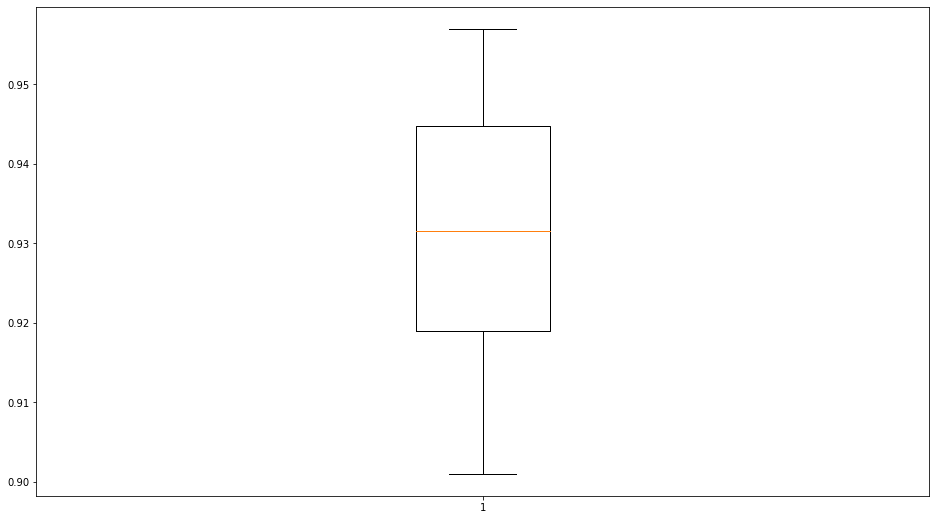

In [16]:
high_hdi_data = high_hdi['HDI']
plt.figure(figsize=(16,9))
plt.boxplot(high_hdi_data)

count    189.000000
mean       0.722423
std        0.149791
min        0.394000
25%        0.602000
50%        0.740000
75%        0.829000
max        0.957000
Name: HDI, dtype: float64

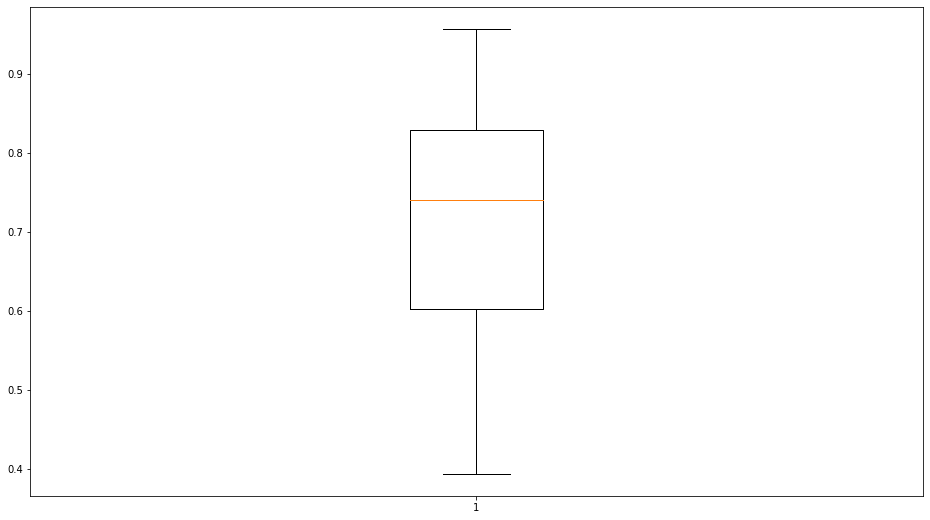

In [17]:
hdi_data = data['HDI']
plt.figure(figsize=(16,9))
plt.boxplot(hdi_data)
hdi_data.describe()

In [18]:
data.loc[data['HDI'] > 0.722]

,Rank,5 Year Change,Nation,HDI,Avg Growth
1,69,(4),Albania,0.795,0.72%
2,91,0,Algeria,0.748,0.41%
3,36,(4),Andorra,0.868,0.40%
5,78,(1),Antigua and Barbuda,0.778,0.22%
6,46,(2),Argentina,0.845,0.21%
...,...,...,...,...,...
177,74,(1),Ukraine,0.779,0.35%
178,31,(6),United Arab Emirates,0.890,0.91%
179,13,0,United Kingdom,0.932,0.24%
180,17,(3),United States,0.926,0.12%


In [19]:
data.loc[data['Avg Growth'] > '1.00%']

,Rank,5 Year Change,Nation,HDI,Avg Growth
4,148,(4),Angola,0.581,1.31%
13,133,(8),Bangladesh,0.632,1.41%
18,158,(1),Benin,0.545,1.10%
19,129,(1),Bhutan,0.654,1.46%
22,100,(5),Botswana,0.735,1.15%
26,182,(3),Burkina Faso,0.452,1.83%
28,144,0,Cambodia,0.594,1.09%
29,153,(1),Cameroon,0.563,1.22%
43,175,0,Democratic Republic of the Congo,0.480,1.10%
45,166,(3),Djibouti,0.524,1.61%


In [20]:
data = data.replace(to_replace = ['NA[a]'], value = '0')

In [21]:
data.loc[data['Avg Growth'] > '1.00%']

,Rank,5 Year Change,Nation,HDI,Avg Growth
4,148,(4),Angola,0.581,1.31%
13,133,(8),Bangladesh,0.632,1.41%
18,158,(1),Benin,0.545,1.10%
19,129,(1),Bhutan,0.654,1.46%
22,100,(5),Botswana,0.735,1.15%
26,182,(3),Burkina Faso,0.452,1.83%
28,144,0,Cambodia,0.594,1.09%
29,153,(1),Cameroon,0.563,1.22%
43,175,0,Democratic Republic of the Congo,0.480,1.10%
45,166,(3),Djibouti,0.524,1.61%


In [22]:
data.loc[data['Nation'].str.contains('Marshall Islands')]

,Rank,5 Year Change,Nation,HDI,Avg Growth
107,117,0,Marshall Islands,0.704,0


In [23]:
data.dtypes

Rank               int64
5 Year Change     object
Nation            object
HDI              float64
Avg Growth        object
dtype: object

In [24]:
data

,Rank,5 Year Change,Nation,HDI,Avg Growth
0,169,(5),Afghanistan,0.511,0.89%
1,69,(4),Albania,0.795,0.72%
2,91,0,Algeria,0.748,0.41%
3,36,(4),Andorra,0.868,0.40%
4,148,(4),Angola,0.581,1.31%
...,...,...,...,...,...
184,113,(44),Venezuela,0.711,0.69%
185,117,(1),Vietnam,0.704,0.70%
186,179,(16),Yemen,0.470,0.82%
187,146,0,Zambia,0.584,1.15%


In [25]:
data[data.Rank.isin([2])]

,Rank,5 Year Change,Nation,HDI,Avg Growth
80,2,(7),Ireland,0.955,0.65%
164,2,0,Switzerland,0.955,0.16%


In [26]:
data.HDI.pct_change()

0           NaN
1      0.555773
2     -0.059119
3      0.160428
4     -0.330645
         ...   
184    0.167488
185   -0.009845
186   -0.332386
187    0.242553
188   -0.022260
Name: HDI, Length: 189, dtype: float64

In [27]:
data.Rank.nunique()

154

In [28]:
data.memory_usage().sum() / (1024**2)

0.00733184814453125

In [29]:
data.HDI.describe().to_frame()

,HDI
count,189.000000
mean,0.722423
std,0.149791
min,0.394000
25%,0.602000
50%,0.740000
75%,0.829000
max,0.957000


In [30]:
df1 = pd.DataFrame(data=data['HDI'])
def color_high_values(val):
    color = 'green' if val > 0.899 else 'white'
    return 'color: %s' %color

df1 = df1.style.applymap(color_high_values)
# df1

In [33]:
Nor_data = pd.read_csv('Norway.csv', header = None)

In [39]:
Nor_data.columns = ['Year', 'HDI']
Nor_data.set_index('Year', inplace = True)
Nor_data

,HDI
Year,
1990,0.849
1991,0.854
1992,0.861
1993,0.869
1994,0.883
1995,0.881
1996,0.887
1997,0.893
1998,0.904


C:\Users\janma\AppData\Local\Temp\ipykernel_19628\4022434536.py:2: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-og" (-> linestyle='-'). The keyword argument will take precedence.
  axes.plot(Nor_data.index, Nor_data.HDI, '-og', linestyle='-')


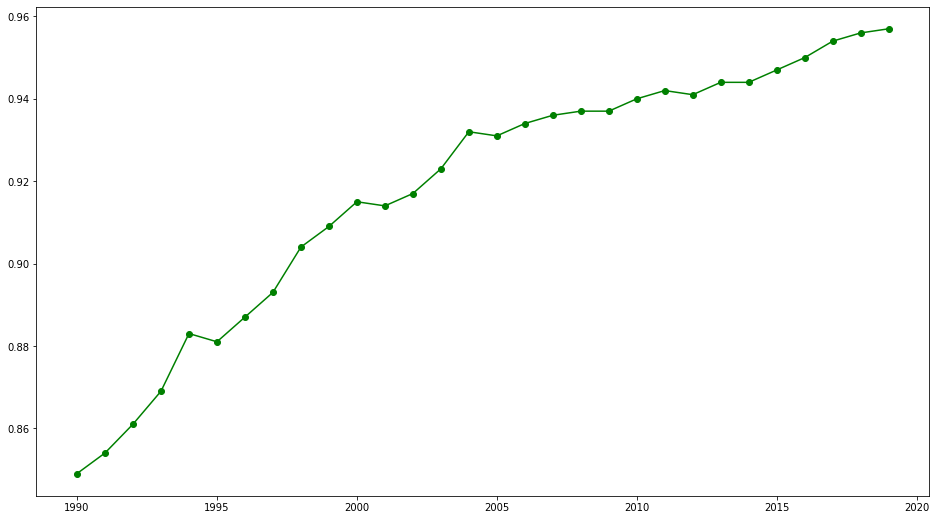

In [56]:
fig, axes = plt.subplots(figsize=(16, 9))
axes.plot(Nor_data.index, Nor_data.HDI, '-og', linestyle='-')

In [52]:
Nor_data.describe()

,HDI
count,30.000000
mean,0.918033
std,0.032029
min,0.849000
25%,0.895750
50%,0.931500
75%,0.941750
max,0.957000
